In [102]:
df.columns


Index(['type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud', 'balanceDiffOrig', 'balanceDiffDest'],
      dtype='object')

In [103]:
df["isFraud"].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [104]:
df["isFlaggedFraud"].value_counts()

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64

In [105]:
df.isnull().sum().sum()

np.int64(0)

In [106]:
df.shape

(6362620, 12)

In [107]:
round((df["isFraud"].value_counts()[1] / df.shape[0]) * 100,2)

np.float64(0.13)

Text(0, 0.5, 'Count')

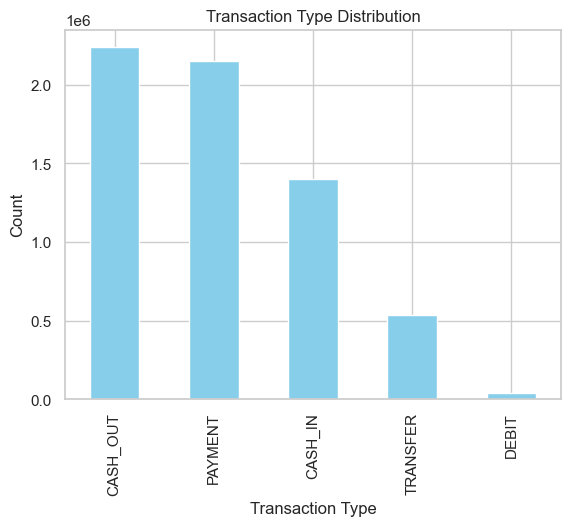

In [108]:
df["type"].value_counts().plot(kind='bar',color ="skyblue", title='Transaction Type Distribution')
plt.xlabel('Transaction Type')
plt.ylabel('Count')

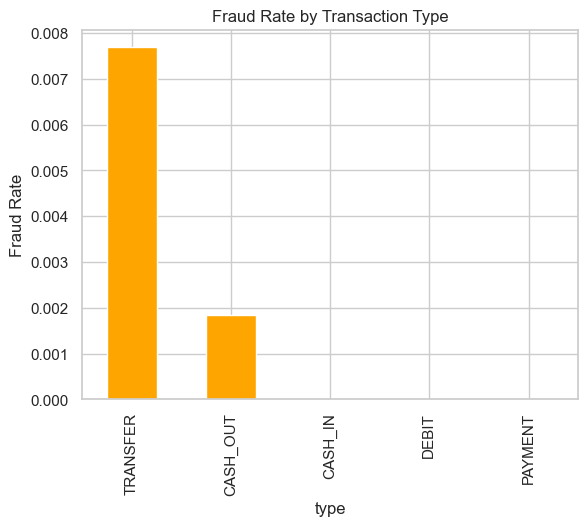

In [109]:
fraud_by_type = df.groupby("type")["isFraud"].mean().sort_values(ascending=False)
fraud_by_type.plot(kind='bar', color='orange', title='Fraud Rate by Transaction Type')
plt.ylabel('Fraud Rate')
plt.show()

In [110]:
fraud_by_type

type
TRANSFER    0.007688
CASH_OUT    0.001840
CASH_IN     0.000000
DEBIT       0.000000
PAYMENT     0.000000
Name: isFraud, dtype: float64

In [111]:
df["amount"].describe().astype(int)

count     6362620
mean       179861
std        603858
min             0
25%         13389
50%         74871
75%        208721
max      92445516
Name: amount, dtype: int64

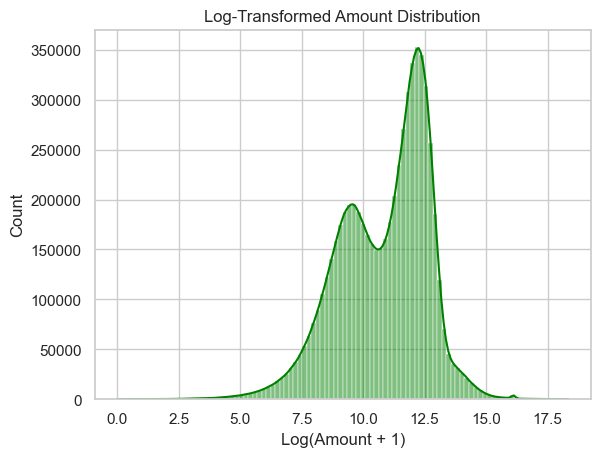

In [112]:
sns.histplot(np.log1p(df["amount"]), bins=100, kde=True, color="green")
plt.title('Log-Transformed Amount Distribution')
plt.xlabel('Log(Amount + 1)')
plt.show()

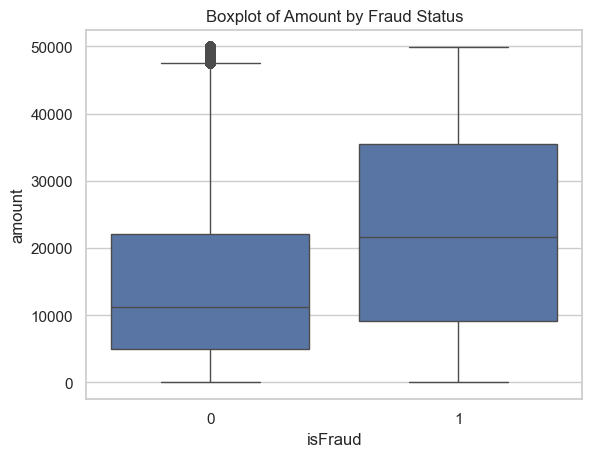

In [113]:
sns.boxplot(data =df[df["amount"] < 50000], x = "isFraud", y = "amount")
plt.title('Boxplot of Amount by Fraud Status')
plt.show()


In [114]:
df["balanceDiffOrig"] = df["oldbalanceOrg"] - df["newbalanceOrig"]
df["balanceDiffDest"] = df["oldbalanceDest"] - df["newbalanceDest"]

In [ ]:
(df["balanceDiffOrig"] < 0).sum()

In [115]:
(df["balanceDiffDest"] < 0).sum()

np.int64(2806464)

In [116]:
df.head(2)

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0


In [122]:
df.columns

Index(['type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud', 'balanceDiffOrig', 'balanceDiffDest'],
      dtype='object')

In [119]:
print(df.columns)

Index(['type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud', 'balanceDiffOrig', 'balanceDiffDest'],
      dtype='object')


In [125]:
top_senders = df["nameOrig"].value_counts().head(10)


In [126]:
top_senders

nameOrig
C1677795071    3
C1999539787    3
C724452879     3
C1976208114    3
C400299098     3
C1784010646    3
C1530544995    3
C1065307291    3
C545315117     3
C1902386530    3
Name: count, dtype: int64

In [127]:
top_recievers = df["nameDest"].value_counts().head(10)

In [128]:
top_recievers

nameDest
C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
C1590550415    101
C1789550256     99
C451111351      99
C1360767589     98
C1023714065     97
Name: count, dtype: int64

In [129]:
fraud_users = df[df["isFraud"] == 1]["nameOrig"].value_counts().head(10)

In [130]:
fraud_users

nameOrig
C1305486145    1
C840083671     1
C1420196421    1
C2101527076    1
C137533655     1
C1118430673    1
C749981943     1
C1334405552    1
C467632528     1
C1364127192    1
Name: count, dtype: int64

In [131]:
fraud_types = df[df["type"].isin(["CASH_OUT", "TRANSFER"])]

In [132]:
fraud_types["type"].value_counts()


type
CASH_OUT    2237500
TRANSFER     532909
Name: count, dtype: int64

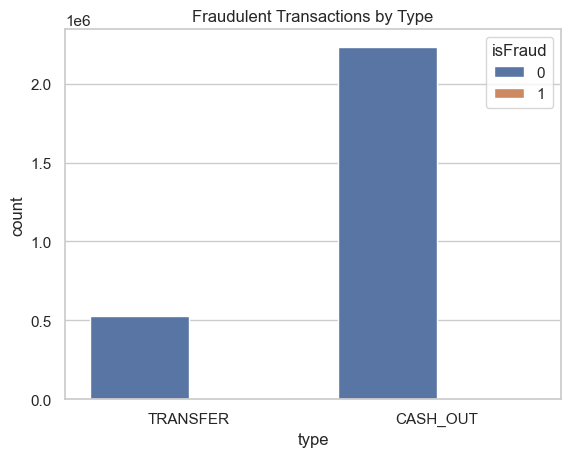

In [133]:
sns.countplot(data=fraud_types, x='type', hue='isFraud')
plt.title('Fraudulent Transactions by Type')
plt.show()

In [134]:
corr = df[["amount", "oldbalanceOrg", "newbalanceOrig", "oldbalanceDest", "newbalanceDest", "isFraud"]].corr()

In [135]:
corr

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
amount,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688
oldbalanceOrg,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154
newbalanceOrig,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148
oldbalanceDest,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885
newbalanceDest,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535
isFraud,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000


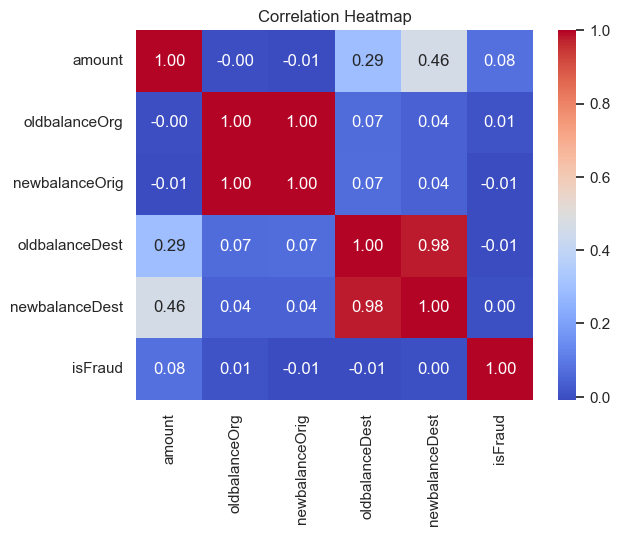

In [136]:
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [137]:
zero_after_transfer = df[
    (df["oldbalanceOrg"] == 0) &
    (df["newbalanceOrig"] == 0) &
    (df["type"].isin(["TRANSFER","CASH_OUT"]))
]

In [138]:
len(zero_after_transfer)

1308582

In [139]:
zero_after_transfer.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
48,CASH_OUT,5346.89,C512549200,0.0,0.0,C248609774,652637.00,6453430.91,0,0,0.0,-5800793.91
79,TRANSFER,77957.68,C207471778,0.0,0.0,C1761291320,94900.00,22233.65,0,0,0.0,72666.35
80,TRANSFER,17231.46,C1243171897,0.0,0.0,C783286238,24672.00,0.00,0,0,0.0,24672.00
81,TRANSFER,78766.03,C1376151044,0.0,0.0,C1749186397,103772.00,277515.05,0,0,0.0,-173743.05
82,TRANSFER,224606.64,C873175411,0.0,0.0,C766572210,354678.92,0.00,0,0,0.0,354678.92


In [140]:
df["isFraud"].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [141]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [142]:
df.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0
2,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,181.00,0.0
3,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,181.00,21182.0
4,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,11668.14,0.0


In [143]:
df_model = df.drop(["nameOrig","nameDest","isFlaggedFraud"], axis = 1)

In [144]:
df_model.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,balanceDiffOrig,balanceDiffDest
0,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,9839.64,0.0
1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,1864.28,0.0
2,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,181.00,0.0
3,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,181.00,21182.0
4,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,11668.14,0.0


In [145]:
categorical = ["type"]
numeric = ["amount", "oldbalanceOrg", "newbalanceOrig","newbalanceDest"]

In [146]:
y = df_model["isFraud"]
X = df_model.drop("isFraud",axis=1)

In [147]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, stratify=y)

In [148]:
preprocessor = ColumnTransformer(
    transformers= [
        ("num", StandardScaler(), numeric),
        ("cat", OneHotEncoder(drop="first"), categorical)
    ],
    remainder="drop"
)

In [149]:
pipeline = Pipeline([
    ("prep", preprocessor),
    ("clf",LogisticRegression(class_weight="balanced", max_iter=1000))
])

In [150]:
print(X_train.columns)

Index(['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'balanceDiffOrig', 'balanceDiffDest'],
      dtype='object')


In [151]:
pipeline.fit(X_train, y_train)

,steps,"[('prep', ...), ('clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [153]:
y_pred = pipeline.predict(X_test)

In [154]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97   1906322
           1       0.02      0.93      0.04      2464

    accuracy                           0.94   1908786
   macro avg       0.51      0.93      0.51   1908786
weighted avg       1.00      0.94      0.97   1908786



In [155]:
confusion_matrix(y_test,y_pred)

array([[1797361,  108961],
       [    183,    2281]])

In [157]:
pipeline.score(X_test, y_test) * 100

94.28202009025632

In [158]:
import joblib
joblib.dump(pipeline,"fraud_detection_pipelin.pkl")

['fraud_detection_pipelin.pkl']

In [ ]:
df.info()

In [ ]:
df.head()

In [ ]:
df = pd.read_csv("AIML Dataset.csv")

In [ ]:
import warnings
warnings.filterwarnings("ignore")
sns.set(style="whitegrid")

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
